# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [9]:
y = y.reshape(len(y),1)

In [10]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_Y.fit_transform(y)

In [15]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [16]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [17]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/opt/anaconda3/envs/pyml/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [18]:
sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[252789.13921624]])

## Visualising the SVR results

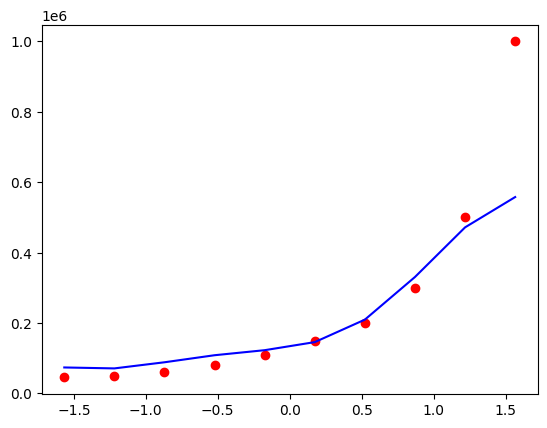

In [19]:
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_Y.inverse_transform(regressor.predict(X).reshape(-1,1)), color='blue')


## Visualising the SVR results (for higher resolution and smoother curve)

/var/folders/pc/_hmwmdzj5vg861_7lwm88pzw0000gn/T/ipykernel_70915/402755338.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid_orig = np.arange(min(X_orig), max(X_orig), 0.1) # Creates points like 1.0, 1.1, 1.2 ... up to max level, with 0.1 step


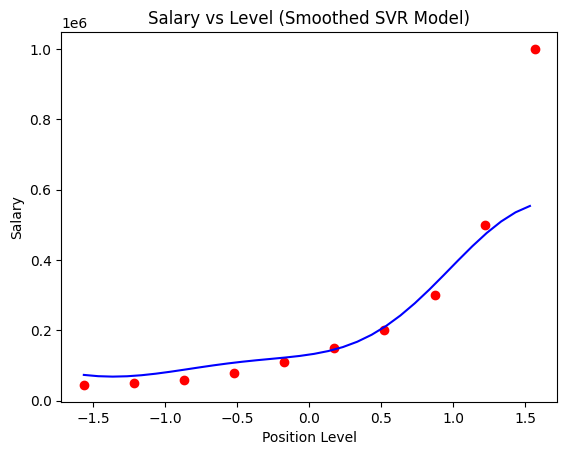

In [20]:
# Previous code ... (imports, data loading, scaling, SVR training)
# regressor.fit(X, y) # Assuming model is trained

# --- Code for smoother curve ---

# 1. Create a grid of X values (original scale) for smoother plotting
#    Get the min and max level from the original (inverse-transformed) data
X_orig = sc_X.inverse_transform(X)
X_grid_orig = np.arange(min(X_orig), max(X_orig), 0.1) # Creates points like 1.0, 1.1, 1.2 ... up to max level, with 0.1 step
X_grid_orig = X_grid_orig.reshape((len(X_grid_orig), 1)) # Reshape to 2D column vector

# 2. Scale this new grid using the SAME scaler used for X
X_grid_scaled = sc_X.transform(X_grid_orig)

# 3. Predict using the SVR model on the scaled grid
y_grid_scaled_pred = regressor.predict(X_grid_scaled)

# 4. Reshape the scaled predictions to 2D array for inverse transform
y_grid_scaled_pred = y_grid_scaled_pred.reshape(-1, 1)

# 5. Inverse transform the predictions back to the original salary scale
y_grid_orig_pred = sc_Y.inverse_transform(y_grid_scaled_pred)

# --- Plotting section ---

# Plot the original data points (as before)
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(y), color = 'red')

# Plot the SMOOTH SVR regression curve using the dense grid
plt.plot(X_grid_orig, y_grid_orig_pred, color='blue') # Use X_grid_orig and y_grid_orig_pred

# Add Titles and Labels (recommended)
plt.title('Salary vs Level (Smoothed SVR Model)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

# Show the plot
plt.show()